## Exercise1 on Sep 21st, 2022

In [ ]:
%%bash
pip install -r requirements.txt > /dev/null 2>&1

### Load MNIST dataset

#### import the dataset and libraries

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/jiawei/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


#### data transformation

(60000, 28, 28)
(10000, 28, 28)


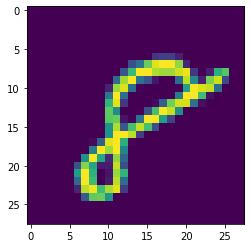

In [6]:
# Loads the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# print the original shape of $train_data
print(train_data.shape)
print(test_data.shape)
# Plots a single digit from the data
plt.imshow(train_data[train_data.shape[0]-1])
plt.show()
# Reshapes the data to work in an FEN
train_data = train_data.reshape((60000, 28**2))
test_data = test_data.reshape((10000, 28**2))
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
num_classes

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### construct the model (reference: https://keras.io/api/layers/core_layers/dense/, https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

#### Exercise 1.1: Construct the model, thus compile the model

In [53]:
model = keras.Sequential()
# two hidden layers are in this model
model.add(layers.Dense(num_classes, activation='relu', input_shape=(28**2, )))
model.add(layers.Dense(num_classes, activation='relu'))
model.add(layers.Dense(num_classes, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [54]:
# use $model_cp to test "rmsprop" optimizer
model_cp = model 
model_cp.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="categorical_crossentropy",
    metrics="accuracy"
)
rmsprop_train_history = model_cp.fit(x=train_data, y=train_labels, batch_size=64, epochs=20, 
             validation_data=(test_data, test_labels), use_multiprocessing=True)

Epoch 1/20


/home/jiawei/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


938/938 [==============================] - 4s 3ms/step - loss: 1.8612 - accuracy: 0.4943 - val_loss: 1.0088 - val_accuracy: 0.6274
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.8759 - accuracy: 0.6981 - val_loss: 0.8496 - val_accuracy: 0.7452
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.7899 - val_loss: 0.6535 - val_accuracy: 0.8125
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.6037 - accuracy: 0.8259 - val_loss: 0.5733 - val_accuracy: 0.8396
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5422 - accuracy: 0.8530 - val_loss: 0.5515 - val_accuracy: 0.8553
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5048 - accuracy: 0.8659 - val_loss: 0.5019 - val_accuracy: 0.8785
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4725 - accuracy: 0.8751 - val_loss: 0.4679 - val_accuracy: 0.8787
Epoch 8/20
938/93

In [55]:
# "Adam" optimizer
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss="categorical_crossentropy",
    metrics="accuracy"
)
adam_train_history = model.fit(x=train_data, y=train_labels, batch_size=64, epochs=20, 
             validation_data=(test_data, test_labels), use_multiprocessing=True)

Epoch 1/20


/home/jiawei/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


938/938 [==============================] - 4s 3ms/step - loss: 0.3187 - accuracy: 0.9139 - val_loss: 0.3238 - val_accuracy: 0.9160
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3021 - accuracy: 0.9184 - val_loss: 0.3202 - val_accuracy: 0.9164
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2930 - accuracy: 0.9214 - val_loss: 0.3032 - val_accuracy: 0.9191
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2798 - accuracy: 0.9239 - val_loss: 0.3004 - val_accuracy: 0.9236
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2767 - accuracy: 0.9249 - val_loss: 0.2983 - val_accuracy: 0.9207
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2696 - accuracy: 0.9263 - val_loss: 0.3056 - val_accuracy: 0.9208
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2592 - accuracy: 0.9294 - val_loss: 0.3040 - val_accuracy: 0.9226
Epoch 8/20
938/93

#### Compare "Adam" and "rmsprop" optimizer. Reference: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

#### Exercise 1.2: Report the accuracy of the models (Adam and RmsProp respectively)

In [56]:
adam_acc = model.evaluate(test_data, test_labels)[1] # returns to (loss, accuracy)
rmsprop_acc = model_cp.evaluate(test_data, test_labels)[1] # returns to (loss, accuracy)
print(f"Accuracy of the Adam model: {round(adam_acc, 4)}", 
      f"Accuracy of the RmsProps model: {round(rmsprop_acc, 4)}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9284
Accuracy of the Adam model: 0.9284 Accuracy of the RmsProps model: 0.9284


#### Exercise 1.3: Plot the learning history from the history element

In [65]:
print(type(adam_train_history.history), type(rmsprop_train_history.history))
print(adam_train_history.history.keys())

<class 'dict'> <class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [68]:
type(adam_train_history)

keras.callbacks.History

In [79]:
def plot_training(history: keras.callbacks.History, title_suffix: str):    
    num_epochs = len(history.history['loss'])
    plt.plot(range(num_epochs), history.history['loss'], '-', color='r', label='Training loss')
    plt.plot(range(num_epochs), history.history['val_loss'], '--', color='purple', label='Validation loss')
    plt.plot(range(num_epochs), history.history['accuracy'], '-', color='b', label='Training accuracy')
    plt.plot(range(num_epochs), history.history['val_accuracy'], '--', color='purple', label='Validation accuracy')
    plt.title(f'Training and validation loss {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.show()

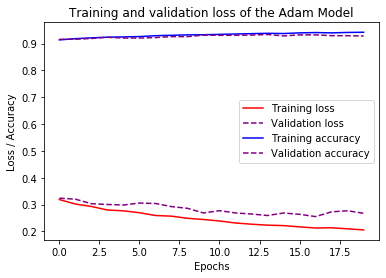

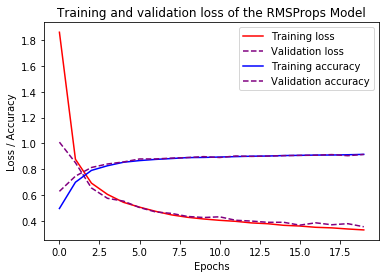

In [80]:
plot_training(adam_train_history, "of the Adam Model")
plot_training(rmsprop_train_history, "of the RMSProps Model")

--------------------------------------------------------------------------------------------------------------

## Exercise2 on Sep 28th, 2022

### Download the input dataset and store it at <code>src/auto.csv</code>

#### import the dataset and libraries

In [ ]:
%%bash
pip install statsmodels > /dev/null 2>&1

In [100]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [46]:
%%bash
head -n5 src/auto.csv && wc -l src/auto.csv

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11,70,1,plymouth satellite
16,8,304,150,3433,12,70,1,amc rebel sst
398 src/auto.csv


In [47]:
df = pd.read_csv("src/auto.csv")
df.shape

(398, 9)

#### Inspect potential non-numerical values

In [48]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

#### We could see that some rows have missing values at "horsepower". Check the non-numerical values

In [49]:
df[~df['horsepower'].str.match("^[0-9]")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [50]:
df.drop(df[~df['horsepower'].str.match("^[0-9]")].index, inplace=True) # axis=0: drop rows

In [53]:
df['horsepower'] = df['horsepower'].astype(float)

In [57]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [60]:
df.shape

(392, 9)

#### Also check the number of unique names

In [52]:
len(pd.unique(df['name']))

301

#### Therefore, we would consider <code>df['name']</code> as useless

In [63]:
df.drop('name', axis=1, inplace=True)

In [65]:
df.shape

(392, 8)

#### Generate a scatterplot using <code>"mpg"</code> as Y-axis and each of other variables at X-axis

In [70]:
numerical_predictors = list(df.columns[df.columns!="mpg"])

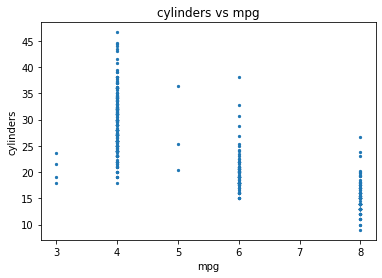

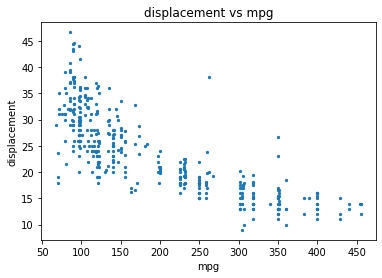

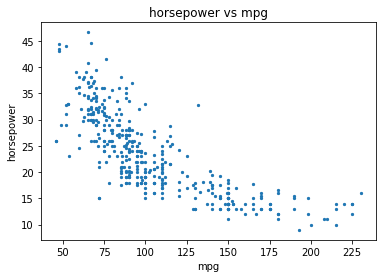

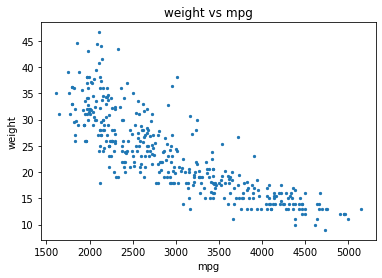

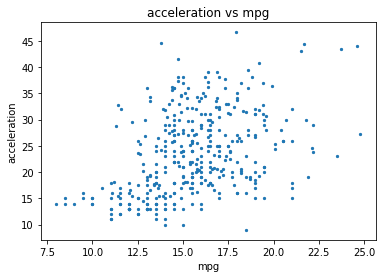

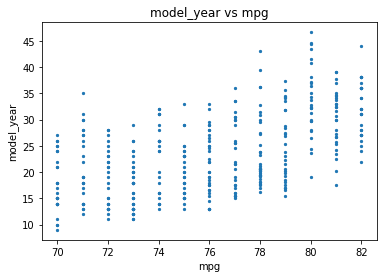

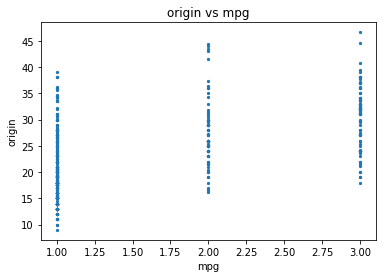

In [103]:
y_col = "mpg"

for predictor in numerical_predictors:
    ax = plt.gca()
    ax.scatter(df[predictor], df[y_col], s=5)
    ax.set_xlabel(y_col)
    ax.set_ylabel(predictor)
    ax.set_title(f"{predictor} vs {y_col}")
    plt.show()

#### Inspect the P-value of each predictor

In [101]:
from statsmodels.formula.api import ols

In [105]:
corr_cmd = f'{y_col} ~ {" + ".join(numerical_predictors)}'
corr_cmd

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + origin'

#### Extract the non-significant predictors

In [158]:
linear_model = ols(corr_cmd, data=df).fit()
pvals = linear_model.pvalues
print(type(pvals))

<class 'pandas.core.series.Series'>


In [159]:
pvals = pvals.to_dict()

In [160]:
irrelevant_cols = [col for col in pvals.keys() if pvals[col] >= 0.05]
irrelevant_cols

['cylinders', 'horsepower', 'acceleration']

#### Subsequently, remove <code>irrelevant_cols</code> and inspect P-values again

In [161]:
corr_cmd2 = f'{y_col} ~ {" + ".join([el for el in numerical_predictors if el not in set(irrelevant_cols)])}'
corr_cmd2

'mpg ~ displacement + weight + model_year + origin'

In [162]:
linear_model2 = ols(corr_cmd2, data=df).fit()
pvals2 = linear_model2.pvalues.to_dict()
irrelevant_cols2 = [col for col in pvals2.keys() if pvals2[col] >= 0.05]
irrelevant_cols2

['displacement']

In [164]:
irrelevant_cols += irrelevant_cols2
print(f'Non-significant predictors are: {", ".join(irrelevant_cols)}')

Non-significant predictors are: cylinders, horsepower, acceleration, displacement


#### Thus, test the effect of log, square root, square, reciprocal transformation on <code>df</code>

In [146]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


#### Logarithmic

In [166]:
df_arr = np.array(df) # make it easier to transform
new_df = pd.DataFrame(data=np.log(df_arr), columns=df.columns)
corr_cmd = f'{y_col} ~ {" + ".join(numerical_predictors)}'
linear_model = ols(corr_cmd, data=new_df).fit()
pvals = linear_model.pvalues.to_dict()
irrelevant_cols = [col for col in pvals.keys() if pvals[col] >= 0.05]
irrelevant_cols

['Intercept', 'cylinders', 'displacement']

In [167]:
linear_model.summary() # we could see that "acceleration" has very low p-value now 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     445.3
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          5.86e-180
Time:                        10:59:26   Log-Likelihood:                 300.34
No. Observations:                 392   AIC:                            -584.7
Df Residuals:                     384   BIC:                            -552.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1554      0.648     -0.240      0.811      -1.430       1.119
cylinders       -0.0828      0.061     -1.348      0.178      -0.204       0.038
displacement     0.0066      0.057      0.116      0.907      -0.105       0.119
horsepower      -0.2944      0.058     -5.106      0.000      -0.408      -0.181
weight          -0.5697      0.082     -6.914      0.000      -0.732      -0.408
acceleration    -0.1792      0.060     -3.011      0.003      -0.296      -0.062
model_year       2.2440      0.132     17.044      0.000       1.985       2.503
origin           0.0448      0.019      2.383      0.018       0.008       0.082
==============================================================================
Omnibus:                        8.794   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               14.713
Skew:                          -0.059   Prob(JB):                     0.000638
Kurtosis:                       3.942   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Square root

In [168]:
df_arr = np.array(df) # make it easier to transform
new_df = pd.DataFrame(data=np.sqrt(df_arr), columns=df.columns)
corr_cmd = f'{y_col} ~ {" + ".join(numerical_predictors)}'
linear_model = ols(corr_cmd, data=new_df).fit()
pvals = linear_model.pvalues.to_dict()
irrelevant_cols = [col for col in pvals.keys() if pvals[col] >= 0.05]
irrelevant_cols

['cylinders', 'displacement', 'acceleration']

In [169]:
linear_model.summary() # we could see that "horsepower" has very low p-value now 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     355.1
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          2.12e-163
Time:                        11:00:44   Log-Likelihood:                -75.526
No. Observations:                 392   AIC:                             167.1
Df Residuals:                     384   BIC:                             198.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.9493      0.847     -2.300      0.022      -3.616      -0.283
cylinders       -0.1086      0.142     -0.765      0.445      -0.388       0.171
displacement     0.0197      0.021      0.930      0.353      -0.022       0.061
horsepower      -0.0909      0.028     -3.197      0.002      -0.147      -0.035
weight          -0.0614      0.007     -8.422      0.000      -0.076      -0.047
acceleration    -0.1073      0.077     -1.392      0.165      -0.259       0.044
model_year       1.2660      0.079     15.963      0.000       1.110       1.422
origin           0.2723      0.071      3.842      0.000       0.133       0.412
==============================================================================
Omnibus:                       14.303   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.858
Skew:                           0.233   Prob(JB):                     6.59e-06
Kurtosis:                       4.115   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Square

In [173]:
df_arr = np.array(df) # make it easier to transform
new_df = pd.DataFrame(data=np.square(df_arr), columns=df.columns)
corr_cmd = f'{y_col} ~ {" + ".join(numerical_predictors)}'
linear_model = ols(corr_cmd, data=new_df).fit()
pvals = linear_model.pvalues.to_dict()
irrelevant_cols = [col for col in pvals.keys() if pvals[col] >= 0.05]
irrelevant_cols

['horsepower']

In [174]:
linear_model.summary() # only 'horsepower' has an extremely high P-value now

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     131.4
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           7.64e-98
Time:                        11:03:19   Log-Likelihood:                -2664.4
No. Observations:                 392   AIC:                             5345.
Df Residuals:                     384   BIC:                             5377.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -752.2880    145.649     -5.165      0.000   -1038.658    -465.918
cylinders       -3.7460      1.559     -2.403      0.017      -6.810      -0.682
displacement     0.0034      0.001      3.926      0.000       0.002       0.005
horsepower       0.0001      0.003      0.042      0.967      -0.006       0.006
weight       -4.834e-05   5.55e-06     -8.707      0.000   -5.92e-05   -3.74e-05
acceleration     0.4892      0.166      2.941      0.003       0.162       0.816
model_year       0.2731      0.022     12.513      0.000       0.230       0.316
origin          26.0839      4.275      6.101      0.000      17.678      34.489
==============================================================================
Omnibus:                       92.213   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.270
Skew:                           1.135   Prob(JB):                     3.00e-52
Kurtosis:                       6.062   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Reciprocal

In [175]:
df_arr = np.array(df) # make it easier to transform
new_df = pd.DataFrame(data=np.reciprocal(df_arr), columns=df.columns)
corr_cmd = f'{y_col} ~ {" + ".join(numerical_predictors)}'
linear_model = ols(corr_cmd, data=new_df).fit()
pvals = linear_model.pvalues.to_dict()
irrelevant_cols = [col for col in pvals.keys() if pvals[col] >= 0.05]
irrelevant_cols

['Intercept', 'acceleration']

In [176]:
linear_model.summary() # only 'acceleration' and 'intercept' have high P-values now

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     316.9
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          2.97e-155
Time:                        11:05:31   Log-Likelihood:                 1424.9
No. Observations:                 392   AIC:                            -2834.
Df Residuals:                     384   BIC:                            -2802.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0080      0.009     -0.913      0.362      -0.025       0.009
cylinders       -0.0974      0.014     -6.760      0.000      -0.126      -0.069
displacement     1.7201      0.413      4.167      0.000       0.908       2.532
horsepower      -0.8606      0.255     -3.377      0.001      -1.362      -0.359
weight        -100.5920     11.543     -8.715      0.000    -123.287     -77.897
acceleration    -0.0090      0.041     -0.221      0.825      -0.089       0.071
model_year       8.1185      0.560     14.508      0.000       7.018       9.219
origin           0.0038      0.002      2.232      0.026       0.000       0.007
==============================================================================
Omnibus:                       58.188   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.076
Skew:                           0.758   Prob(JB):                     4.66e-30
Kurtosis:                       5.443   Cond. No.                     4.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

----------------------------------------------------------------------------------------------------------------